In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from glob import glob
import warnings
warnings.filterwarnings("ignore")
from tqdm import tnrange, tqdm_notebook
import ruptures as rpt
# from utils.custom_cost import CostNew
import json

<h2>Data Preprocessing</h2>

<h3>SKAB</h3>

In [2]:

for file in os.listdir("../datasets/SKAB_data/valve1/"):
    df=pd.read_csv("../datasets/SKAB_data/valve1/"+file,sep=";")
    print(file,df[df.changepoint==1.0].values[0])

0.csv ['2020-03-09 10:24:33' 0.0270327 0.0405338 0.839896 0.382638 78.6736
 25.9506 219.573 32.0 1.0 1.0]
1.csv ['2020-03-09 10:44:33' 0.0267892 0.0419332 0.469496 0.054711 74.104
 25.7334 207.717 32.0 1.0 1.0]
10.csv ['2020-03-09 13:44:39' 0.0275172 0.0399709 0.859602 0.382638 67.5893
 24.7813 227.36 32.0 1.0 1.0]
11.csv ['2020-03-09 14:04:39' 0.0274333 0.0400381 0.418795 0.382638 68.9833
 24.7429 217.114 32.0 1.0 1.0]
12.csv ['2020-03-09 14:24:40' 0.0274274 0.0429959 1.30848 0.054711 66.3487
 24.6733 233.079 32.9752 1.0 1.0]
13.csv ['2020-03-09 14:44:41' 0.0279539 0.0410801 0.521702 -0.273216 68.0914
 24.5743 217.118 32.028 1.0 1.0]
14.csv ['2020-03-09 15:04:41' 0.0272609 0.0413681 0.911095 0.382638 68.3213
 24.532 233.785 32.9707 1.0 1.0]
15.csv ['2020-03-09 15:24:41' 0.0271094 0.0395289 0.709193 -0.601143 65.9262
 24.5708 250.621 33.0 1.0 1.0]
2.csv ['2020-03-09 11:05:40' 0.0266399 0.0408179 0.912087 0.382638 70.975
 25.5324 233.296 31.9978 1.0 1.0]
3.csv ['2020-03-09 11:24:34' 0.0

In [3]:

for file in os.listdir("../datasets/SKAB_data/valve2/"):
    df=pd.read_csv("../datasets/SKAB_data/valve2/"+file,sep=";")
    print(file,df[df.changepoint==1.0].values[0])

0.csv ['2020-03-09 16:06:30' 0.0306772 0.0407653 0.677648 -0.273216 70.1041
 24.3535 223.897 32.0 1.0 1.0]
1.csv ['2020-03-09 16:26:30' 0.0274886 0.0407966 1.16262 -0.273216 67.4538
 24.2726 231.836 32.0 1.0 1.0]
2.csv ['2020-03-09 16:46:31' 0.027637 0.0413034 0.690943 0.382638 66.9962
 24.1923 238.751 31.0419 1.0 1.0]
3.csv ['2020-03-09 17:06:31' 0.0276008 0.0397729 0.68399 0.382638 68.5863
 24.1573 244.154 32.0 1.0 1.0]


In [4]:
for file in os.listdir("../datasets/SKAB_data/other/"):
    df=pd.read_csv("../datasets/SKAB_data/other/"+file,sep=";")
    print(file,df[df.changepoint==1.0].values[0])

1.csv ['2020-03-01 15:53:50' 0.0796652 0.130515 1.79592 0.054711 90.1938 22.2448
 231.964 77.0 1.0 1.0]
10.csv ['2020-02-08 17:57:44' 0.231654 0.27935 1.56497 0.054711 86.497 28.8499
 209.119 126.0 1.0 1.0]
11.csv ['2020-02-08 18:20:42' 0.239336 0.284693 2.72624 0.054711 84.8351 30.505
 227.374 128.0 1.0 1.0]
12.csv ['2020-02-08 18:44:51' 0.238124 0.290388 2.83561 0.382638 85.5066 29.3445
 237.097 125.311 1.0 1.0]
13.csv ['2020-02-08 18:57:29' 0.248972 0.290533 2.58946 0.382638 85.4198 29.0119
 234.208 125.0 1.0 1.0]
14.csv ['2020-02-08 19:26:28' 0.254313 0.2905 2.58967 0.382638 86.3658 28.7306
 228.903 126.694 1.0 1.0]
2.csv ['2020-03-01 16:34:10' 0.0815763 0.131967 2.32633 0.054711 86.6544 22.0971
 252.483 76.0 1.0 1.0]
3.csv ['2020-03-01 16:53:53' 0.0807452 0.135988 1.10632 0.054711 86.7114 22.104
 206.323 76.0201 1.0 1.0]
4.csv ['2020-03-01 17:13:53' 0.0810714 0.132863 1.6675 -0.273216 87.0175 22.0899
 226.707 74.9789 1.0 1.0]
5.csv ['2020-02-08 16:16:48' 0.637152 0.672305 2.09898 

<h3>NAB</h3>

In [5]:
nab_data={}
for folder in os.listdir("../datasets/NAB data/"):
    if folder=="README.md" or folder=="combined_windows.json":
            continue
    print(folder)
    data={}
    for file in os.listdir("../datasets/NAB data/"+folder):
        df=pd.read_csv("../datasets/NAB data/"+folder+"/"+file)
        data[file]=df
    nab_data[folder]=data

artificialNoAnomaly
artificialWithAnomaly
realAdExchange
realAWSCloudwatch
realKnownCause
realTraffic
realTweets


In [6]:
nab_data.keys()

dict_keys(['artificialNoAnomaly', 'artificialWithAnomaly', 'realAdExchange', 'realAWSCloudwatch', 'realKnownCause', 'realTraffic', 'realTweets'])

In [7]:
file_path="../datasets/NAB data/combined_windows.json"

# Load the JSON file
with open(file_path, "r") as f:
    nab_labels = json.load(f)
nab_labels.keys()


dict_keys(['artificialNoAnomaly/art_daily_no_noise.csv', 'artificialNoAnomaly/art_daily_perfect_square_wave.csv', 'artificialNoAnomaly/art_daily_small_noise.csv', 'artificialNoAnomaly/art_flatline.csv', 'artificialNoAnomaly/art_noisy.csv', 'artificialWithAnomaly/art_daily_flatmiddle.csv', 'artificialWithAnomaly/art_daily_jumpsdown.csv', 'artificialWithAnomaly/art_daily_jumpsup.csv', 'artificialWithAnomaly/art_daily_nojump.csv', 'artificialWithAnomaly/art_increase_spike_density.csv', 'artificialWithAnomaly/art_load_balancer_spikes.csv', 'realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv', 'realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv', 'realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv', 'realAWSCloudwatch/ec2_cpu_utilization_77c1ca.csv', 'realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv', 'realAWSCloudwatch/ec2_cpu_utilization_ac20cd.csv', 'realAWSCloudwatch/ec2_cpu_utilization_c6585a.csv', 'realAWSCloudwatch/ec2_cpu_utilization_fe7f93.csv', 'realAWSCloudwatch/ec2_disk_write_bytes_1e

In [8]:
for key,value in nab_labels.items():
    if len(value)>0:
        print(key,len(value))

artificialWithAnomaly/art_daily_flatmiddle.csv 1
artificialWithAnomaly/art_daily_jumpsdown.csv 1
artificialWithAnomaly/art_daily_jumpsup.csv 1
artificialWithAnomaly/art_daily_nojump.csv 1
artificialWithAnomaly/art_increase_spike_density.csv 1
artificialWithAnomaly/art_load_balancer_spikes.csv 1
realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv 2
realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv 2
realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv 2
realAWSCloudwatch/ec2_cpu_utilization_77c1ca.csv 1
realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv 1
realAWSCloudwatch/ec2_cpu_utilization_ac20cd.csv 1
realAWSCloudwatch/ec2_cpu_utilization_fe7f93.csv 3
realAWSCloudwatch/ec2_disk_write_bytes_1ef3de.csv 1
realAWSCloudwatch/ec2_disk_write_bytes_c0d644.csv 3
realAWSCloudwatch/ec2_network_in_257a54.csv 1
realAWSCloudwatch/ec2_network_in_5abac7.csv 2
realAWSCloudwatch/elb_request_count_8c0756.csv 2
realAWSCloudwatch/grok_asg_anomaly.csv 3
realAWSCloudwatch/iio_us-east-1_i-a2eb1cd9_NetworkIn.csv 2
re

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

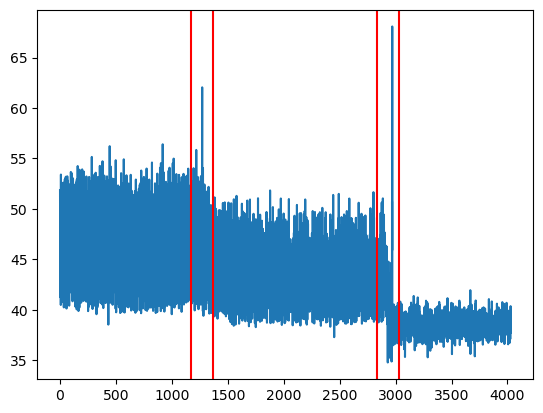

In [9]:
df=pd.read_csv("../datasets/NAB data/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv")
df
plt.plot(df.value)
for pts in nab_labels['realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv']:
    for pt in pts:
        plt.axvline(x=df[df.timestamp==pt.split('.')[0]].index[0],color="red")

<h3>Tep data</h3>

In [10]:
files = sorted(glob('../datasets/TEP_data/*_te.dat'))
files

['../datasets/TEP_data\\d00_te.dat',
 '../datasets/TEP_data\\d01_te.dat',
 '../datasets/TEP_data\\d02_te.dat',
 '../datasets/TEP_data\\d03_te.dat',
 '../datasets/TEP_data\\d04_te.dat',
 '../datasets/TEP_data\\d05_te.dat',
 '../datasets/TEP_data\\d06_te.dat',
 '../datasets/TEP_data\\d07_te.dat',
 '../datasets/TEP_data\\d08_te.dat',
 '../datasets/TEP_data\\d09_te.dat',
 '../datasets/TEP_data\\d10_te.dat',
 '../datasets/TEP_data\\d11_te.dat',
 '../datasets/TEP_data\\d12_te.dat',
 '../datasets/TEP_data\\d13_te.dat',
 '../datasets/TEP_data\\d14_te.dat',
 '../datasets/TEP_data\\d15_te.dat',
 '../datasets/TEP_data\\d16_te.dat',
 '../datasets/TEP_data\\d17_te.dat',
 '../datasets/TEP_data\\d18_te.dat',
 '../datasets/TEP_data\\d19_te.dat',
 '../datasets/TEP_data\\d20_te.dat',
 '../datasets/TEP_data\\d21_te.dat']

In [11]:
columns=[]
for i in range(1, 42):
    columns.append("XMEAS({})".format(i))
for i in range(1, 12):
    columns.append("XMV({})".format(i))

In [12]:
# We do not use the first file because it does not contain a defect
test = {}
for i, j in enumerate(files[1:], start=1):
    test[i] = pd.read_table(j, sep="\s+", names=columns)

In [13]:
len(test[1].columns)

52

In [14]:
test[1]

,XMEAS(1),XMEAS(2),XMEAS(3),XMEAS(4),XMEAS(5),XMEAS(6),XMEAS(7),XMEAS(8),XMEAS(9),XMEAS(10),...,XMV(2),XMV(3),XMV(4),XMV(5),XMV(6),XMV(7),XMV(8),XMV(9),XMV(10),XMV(11)
0,0.25025,3657.2,4520.1,9.3965,26.715,42.191,2704.5,74.593,120.42,0.33701,...,53.850,24.670,61.839,22.101,40.078,33.041,48.969,47.459,41.841,18.049
1,0.25135,3662.1,4532.3,9.4020,26.644,42.812,2704.9,75.044,120.39,0.33723,...,53.705,24.562,61.348,22.264,40.050,39.154,49.870,47.403,41.188,18.008
2,0.25045,3681.9,4493.6,9.2395,26.971,42.282,2705.0,75.405,120.42,0.33643,...,54.167,24.659,61.826,22.312,40.147,39.294,44.511,47.265,41.290,18.009
3,0.25056,3667.9,4466.0,9.3602,26.937,42.194,2705.9,75.397,120.41,0.33891,...,54.498,24.648,63.168,22.288,39.845,36.334,46.168,47.410,40.997,17.771
4,0.28659,3693.0,4502.5,9.5652,26.999,42.540,2704.3,74.749,120.39,0.34173,...,54.142,28.430,57.566,22.142,40.806,34.882,45.576,47.424,41.290,19.371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.75426,3656.7,4536.1,8.8068,26.724,42.227,2700.9,74.242,120.39,0.28932,...,53.348,74.398,56.728,22.327,34.240,37.948,45.863,63.912,40.938,16.964
956,0.75962,3650.0,4459.2,8.8456,27.054,42.361,2701.4,75.182,120.41,0.29400,...,54.261,75.030,58.422,22.548,34.863,38.509,44.698,64.087,42.010,16.724
957,0.75920,3625.5,4501.2,8.8241,26.976,42.511,2704.0,75.614,120.40,0.29359,...,53.758,75.071,57.035,22.941,34.912,36.447,42.824,64.318,40.789,17.699
958,0.78204,3634.0,4508.1,8.8987,27.286,42.300,2702.0,74.805,120.39,0.33121,...,54.191,77.323,57.030,22.481,39.768,30.297,44.762,64.357,41.169,19.572


<h3>MOSAD dataset</h3>

In [17]:
import sys
sys.path.append('../datasets/MOSAD/src')

# import utils

from utils import load_mosad_dataset
df_mosad = load_mosad_dataset()
df_mosad.head()

,dataset,routine,subject,sensor,sample_rate,change_points,activities,time_series
0,Routine1_Subject1_X-Acc,1,1,X-Acc,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.1986, -0.454326, -0.5473, -0.496056, -0.48..."
1,Routine1_Subject1_X-Gyro,1,1,X-Gyro,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[0.0174, 0.0358, 0.0431, 0.0358, 0.0168, 0.008..."
2,Routine1_Subject1_X-Mag,1,1,X-Mag,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-31.02, -30.84, -30.65, -30.58, -31.52, -30.7..."
3,Routine1_Subject1_Y-Acc,1,1,Y-Acc,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.0161, -0.100877, -0.1434, -0.13972, -0.081..."
4,Routine1_Subject1_Y-Gyro,1,1,Y-Gyro,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.0525, -0.0568, -0.0482, -0.0012, 0.0153, 0..."


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

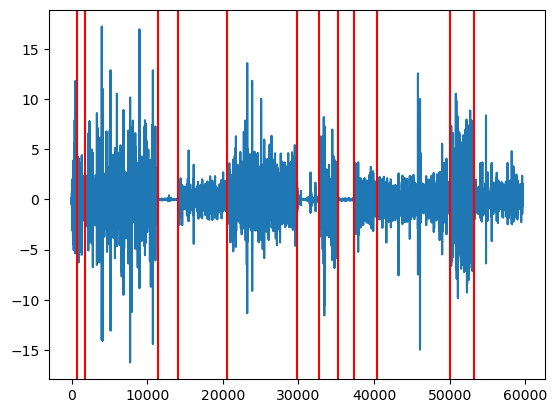

In [25]:
plt.plot(df_mosad.iloc[0].time_series)
cpts=df_mosad.iloc[0].change_points
for pt in cpts:
    plt.axvline(x=pt,color="r")